In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Website_Phishing_Detection.csv")
df.columns

Index(['id', 'Dots_num', 'Level_subD', 'Path_level', 'UrlLength', 'Dash_num',
       'Dash_in_Host', 'At_symbol', 'tilde', 'Underscore_num', 'percent',
       'Query_comp', 'Ampersand', 'Hash', 'NoHttps', 'random_str', 'IP',
       'domain_in_subd', 'domain_in_paths', 'https_in_host', 'double_slash',
       'sensitive_words', 'Emb_brand', 'favicon_ext', 'insecure_forms',
       'Class_label'],
      dtype='object')

**Data cleaning**

In [ ]:
df.head()

,id,Dots_num,Level_subD,Path_level,UrlLength,Dash_num,Dash_in_Host,At_symbol,tilde,Underscore_num,...,IP,domain_in_subd,domain_in_paths,https_in_host,double_slash,sensitive_words,Emb_brand,favicon_ext,insecure_forms,Class_label
0,1,3,1,5,72,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,0,0,1,0,0,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,1,0,0,0,1,1,1,1
4,5,3,0,4,46,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df.head(6)

,id,Dots_num,Level_subD,Path_level,UrlLength,Dash_num,Dash_in_Host,At_symbol,tilde,Underscore_num,...,IP,domain_in_subd,domain_in_paths,https_in_host,double_slash,sensitive_words,Emb_brand,favicon_ext,insecure_forms,Class_label
0,1,3,1,5,72,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,0,0,1,0,0,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,1,0,0,0,1,1,1,1
4,5,3,0,4,46,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,6,3,1,1,42,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,1


In [ ]:
df.tail()

,id,Dots_num,Level_subD,Path_level,UrlLength,Dash_num,Dash_in_Host,At_symbol,tilde,Underscore_num,...,IP,domain_in_subd,domain_in_paths,https_in_host,double_slash,sensitive_words,Emb_brand,favicon_ext,insecure_forms,Class_label
8284,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8285,9997,2,1,4,59,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8286,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8287,9999,3,1,1,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8288,10000,3,1,2,52,3,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df.shape

(8289, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               8289 non-null   int64
 1   Dots_num         8289 non-null   int64
 2   Level_subD       8289 non-null   int64
 3   Path_level       8289 non-null   int64
 4   UrlLength        8289 non-null   int64
 5   Dash_num         8289 non-null   int64
 6   Dash_in_Host     8289 non-null   int64
 7   At_symbol        8289 non-null   int64
 8   tilde            8289 non-null   int64
 9   Underscore_num   8289 non-null   int64
 10  percent          8289 non-null   int64
 11  Query_comp       8289 non-null   int64
 12  Ampersand        8289 non-null   int64
 13  Hash             8289 non-null   int64
 14  NoHttps          8289 non-null   int64
 15  random_str       8289 non-null   int64
 16  IP               8289 non-null   int64
 17  domain_in_subd   8289 non-null   int64
 18  domain_i

In [ ]:
df.describe()

,id,Dots_num,Level_subD,Path_level,UrlLength,Dash_num,Dash_in_Host,At_symbol,tilde,Underscore_num,...,IP,domain_in_subd,domain_in_paths,https_in_host,double_slash,sensitive_words,Emb_brand,favicon_ext,insecure_forms,Class_label
count,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,...,8289.000000,8289.000000,8289.000000,8289.0,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000
mean,4931.238509,2.486910,0.593799,3.275063,67.985161,1.536012,0.143322,0.000362,0.015080,0.314513,...,0.020388,0.022922,0.408734,0.0,0.000965,0.115213,0.059356,0.159850,0.847991,0.525998
std,3044.209967,1.366962,0.754117,1.880890,33.247789,2.764735,0.566279,0.019022,0.121879,1.102005,...,0.141334,0.149664,0.491630,0.0,0.031053,0.378757,0.236304,0.366489,0.359051,0.499354
min,1.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2073.000000,2.000000,0.000000,2.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4785.000000,2.000000,1.000000,3.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,7928.000000,3.000000,1.000000,4.000000,81.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,10000.000000,21.000000,11.000000,18.000000,253.000000,26.000000,9.000000,1.000000,1.000000,18.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
Dots_num,0
Level_subD,0
Path_level,0
UrlLength,0
Dash_num,0
Dash_in_Host,0
At_symbol,0
tilde,0
Underscore_num,0


**EDA**

<ipython-input-10-7bb75ce0baf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class_label', data=df, palette='pastel')


<Axes: xlabel='Class_label', ylabel='count'>

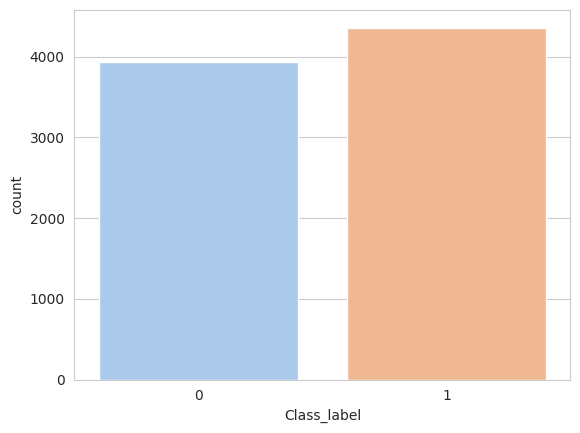

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Class_label', data=df, palette='pastel')

<ipython-input-11-fed3d52629ed>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Class_label'], color='darkred')


<Axes: xlabel='Class_label', ylabel='Density'>

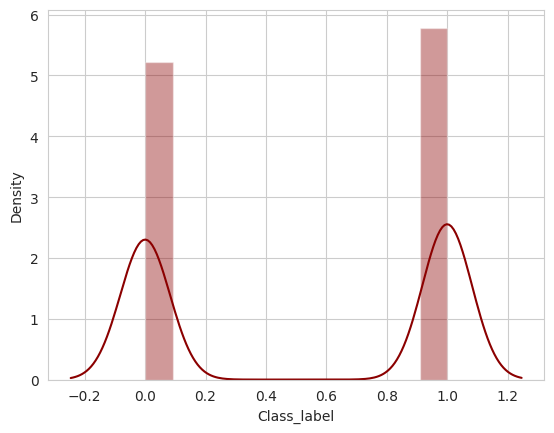

In [ ]:
sns.distplot(df['Class_label'], color='darkred')

In [ ]:
df= df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,id,Dots_num,Level_subD,Path_level,UrlLength,Dash_num,Dash_in_Host,At_symbol,tilde,Underscore_num,...,IP,domain_in_subd,domain_in_paths,https_in_host,double_slash,sensitive_words,Emb_brand,favicon_ext,insecure_forms,Class_label
0,9383,3,1,1,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1454,2,0,3,36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,9187,2,1,2,46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5118,1,0,6,73,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3431,2,1,6,50,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,1671,3,0,4,53,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
8285,7760,2,1,6,94,5,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
8286,8064,4,1,5,70,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8287,2193,2,0,6,75,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1


Text(0.5, 1.0, 'ID vs Class_label')

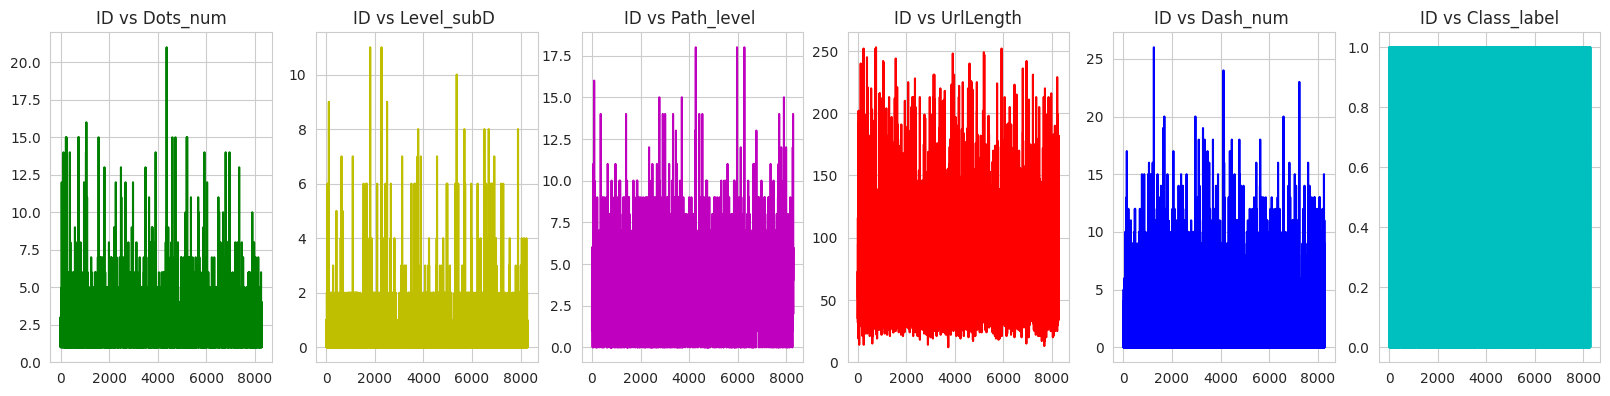

In [ ]:
x1 = df['Dots_num']
x2 = df['Level_subD']
x3 = df['Path_level']
x4 = df['UrlLength']
x5 = df['Dash_num']
x6 = df['Class_label']
x7 = df['Dash_in_Host']
x8 = df['tilde']
plt.figure(figsize=(20,30))
plt.subplot(6,6,1)
plt.plot(x1, c='g')
plt.title("ID vs Dots_num")
plt.subplot(6,6,2)
plt.plot(x2, c='y')
plt.title("ID vs Level_subD ")
plt.subplot(6,6,3)
plt.plot(x3, c='m')
plt.title("ID vs Path_level ")
plt.subplot(6,6,4)
plt.plot(x4, c='r')
plt.title("ID vs UrlLength")
plt.subplot(6,6,5)
plt.plot(x5, c='b')
plt.title("ID vs Dash_num ")
plt.subplot(6,6,6)
plt.plot(x6, c='c')
plt.title("ID vs Class_label")

Text(0.5, 1.0, ' Dash_in_Host vs Class_label ')

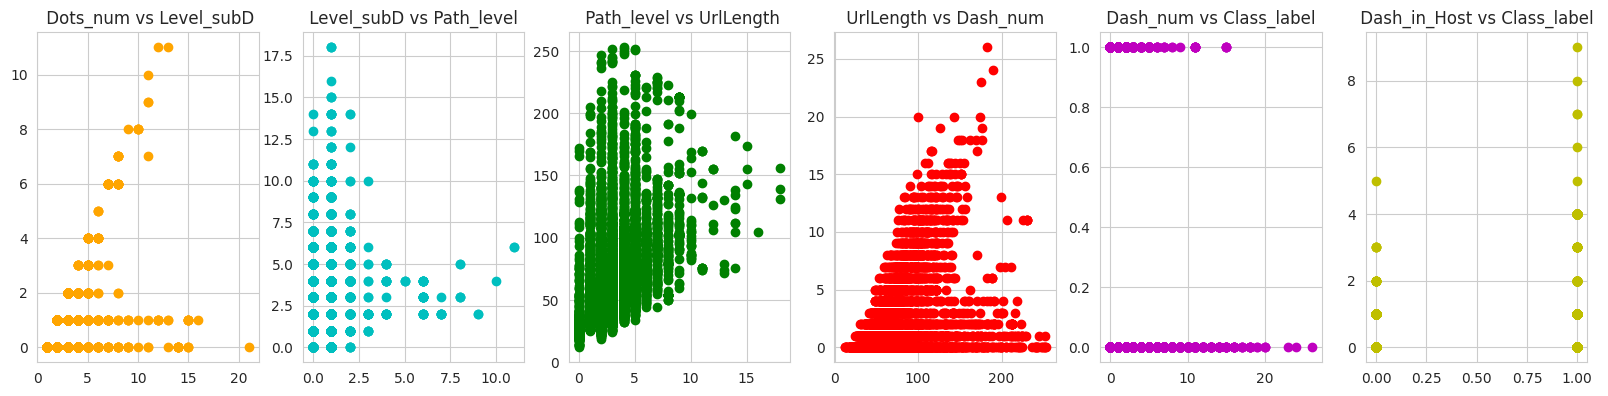

In [ ]:
plt.figure(figsize=(20,30))
plt.subplot(6,6,1)
plt.scatter(x1,x2, c='orange')
plt.title(" Dots_num vs Level_subD")
plt.subplot(6,6,2)
plt.scatter(x2,x3, c='c')
plt.title(" Level_subD vs Path_level ")
plt.subplot(6,6,3)
plt.scatter(x3,x4, c='g')
plt.title(" Path_level vs UrlLength")
plt.subplot(6,6,4)
plt.scatter(x4,x5, c='r')
plt.title(" UrlLength vs Dash_num ")
plt.subplot(6,6,5)
plt.scatter(x5,x6, c='m')
plt.title(" Dash_num vs Class_label ")
plt.subplot(6,6,6)
plt.scatter(x6,x7, c='y')
plt.title(" Dash_in_Host vs Class_label ")

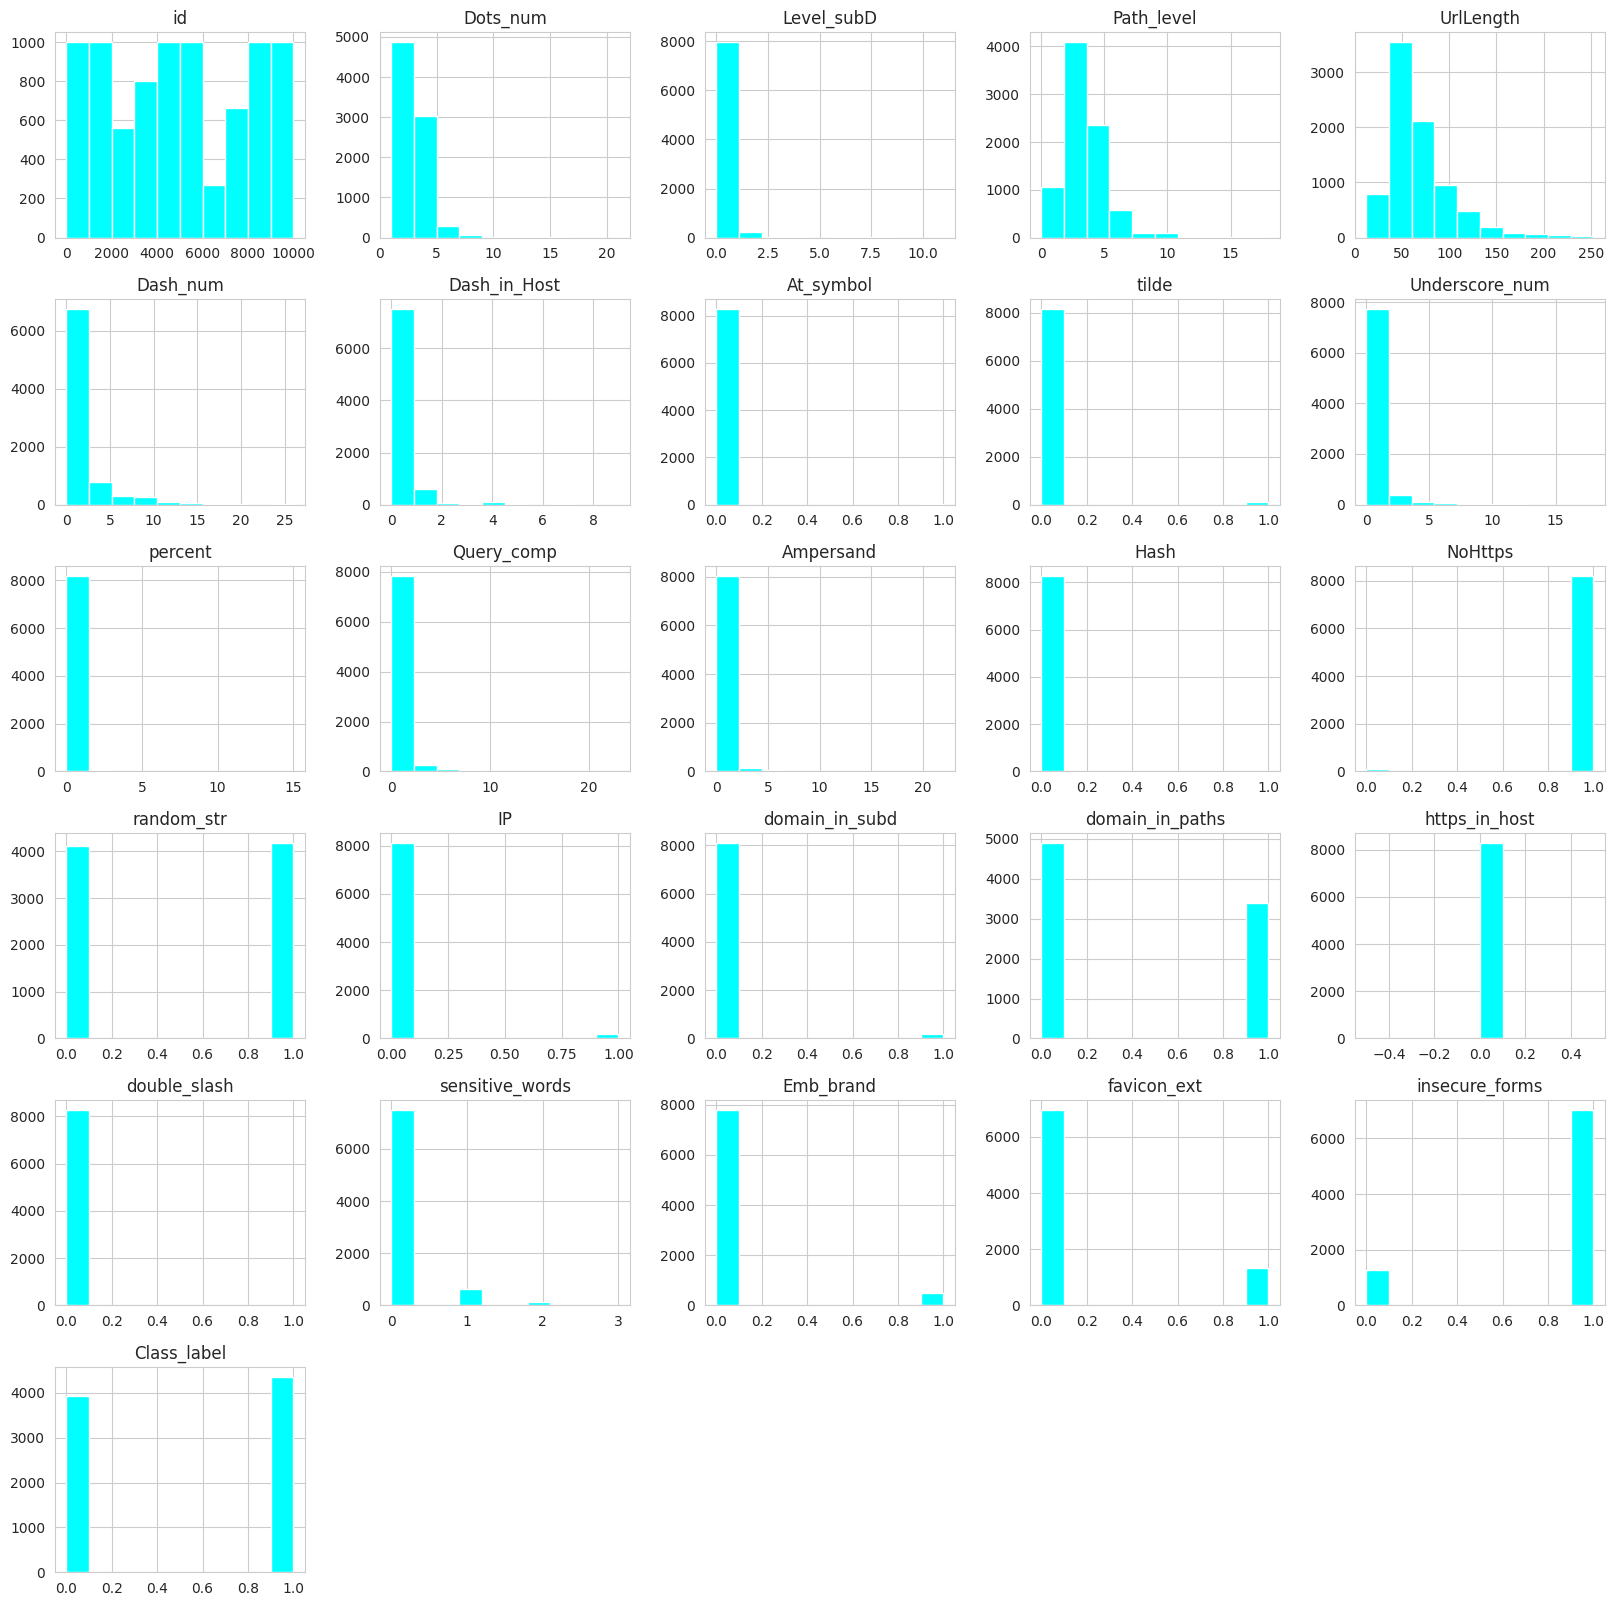

In [ ]:
df.hist(bins = 10,figsize = (20,20), color='cyan')
plt.show()

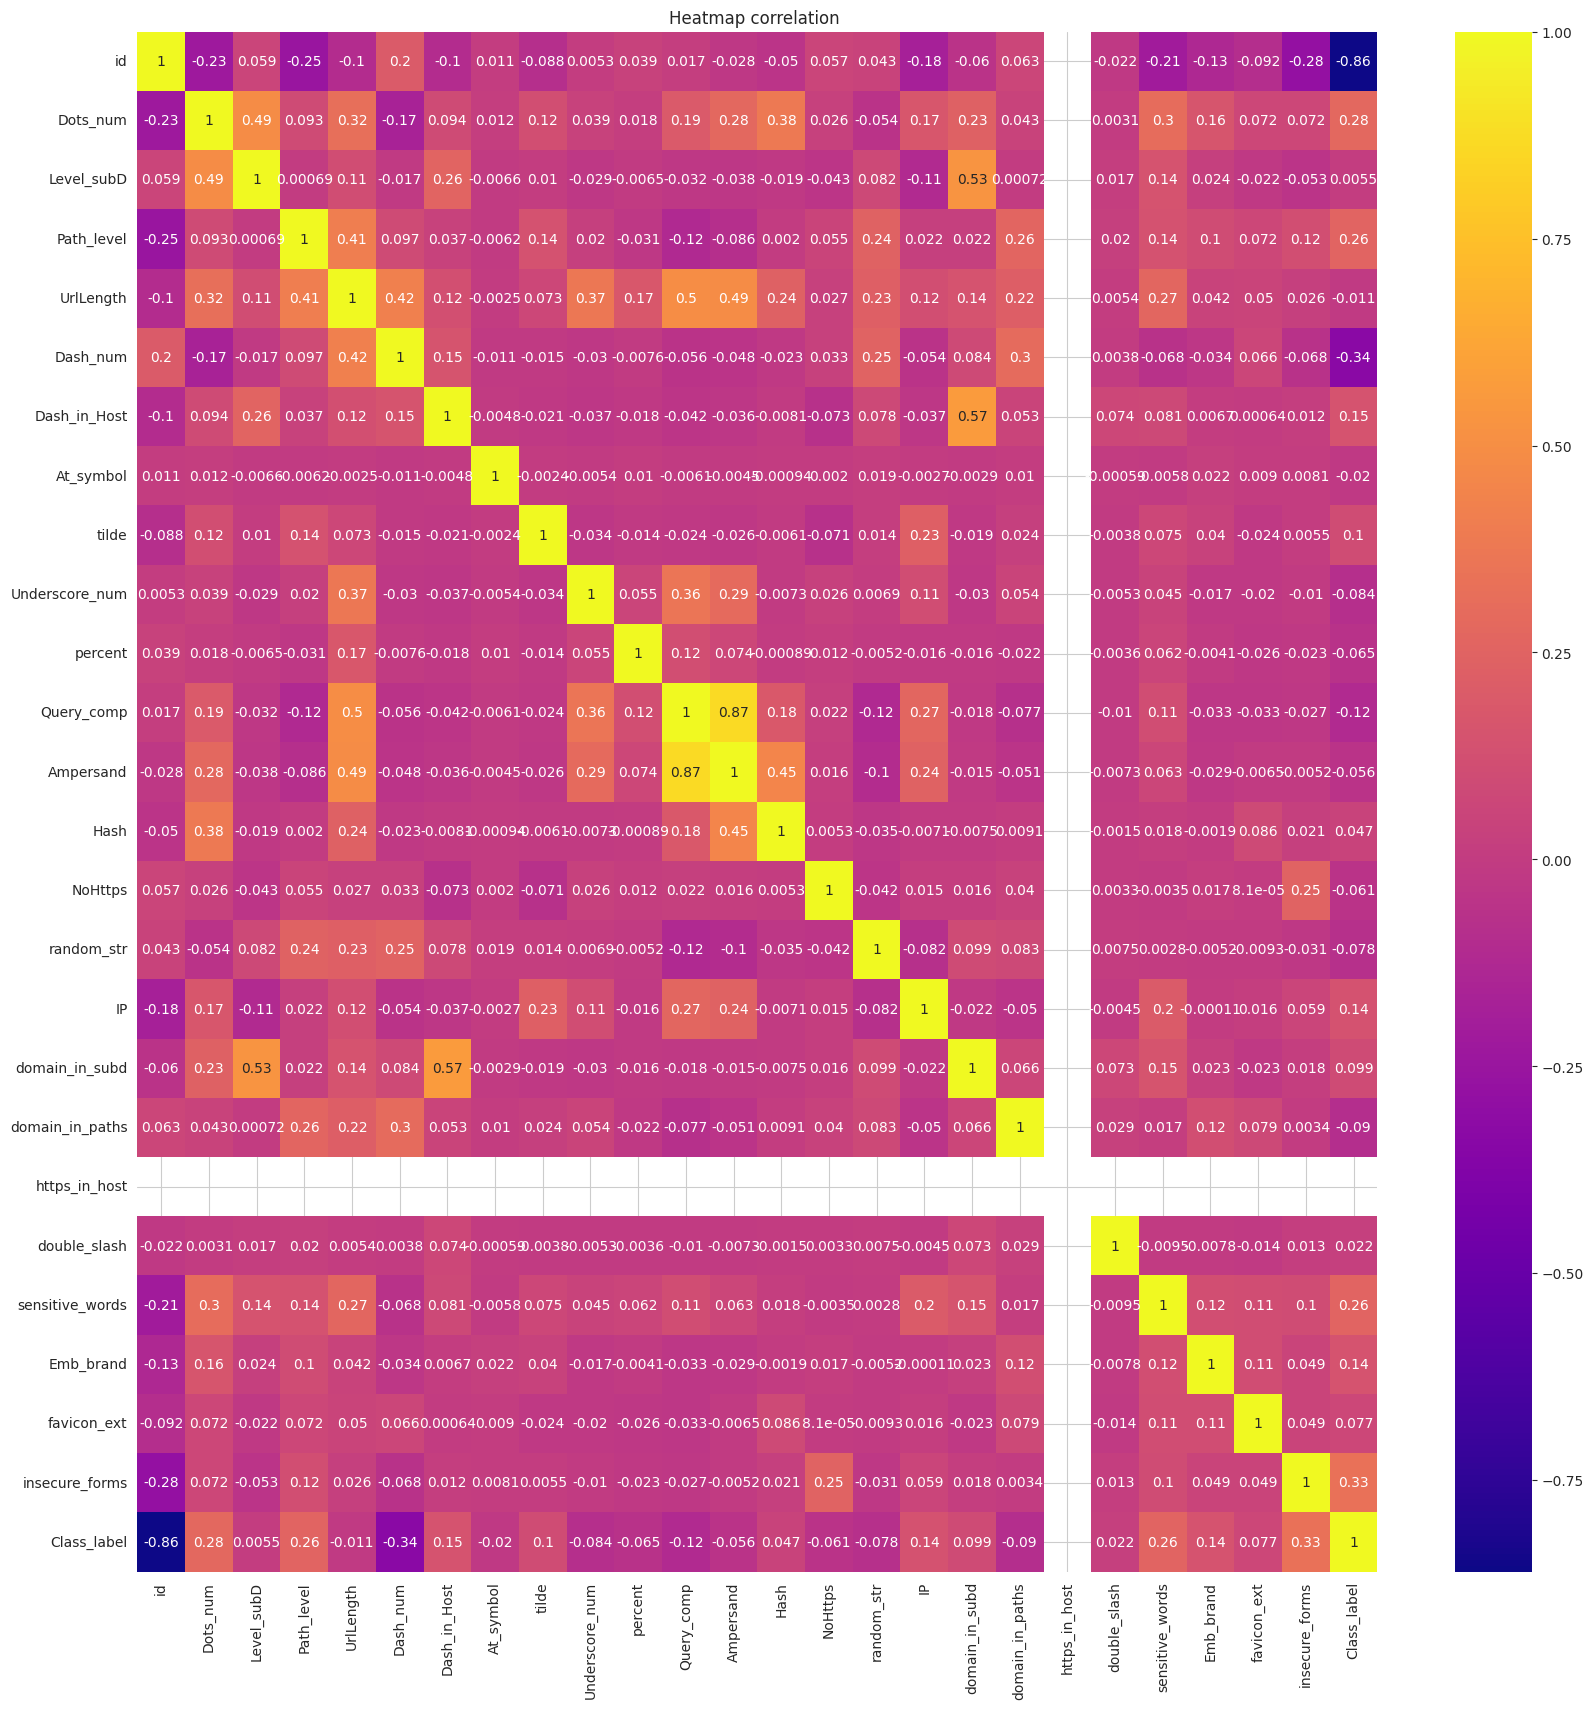

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='plasma',annot=True)
plt.title("Heatmap correlation ")
plt.show()

**Data Preprocessing**

In [ ]:
x = df.drop(columns=['id', 'Class_label'],axis=1)
y = df['Class_label']

In [ ]:
print("Size of X is: " , x.size)
print("Size of Y is: " , y.size)
print("Shape of X is " , x.shape)
print("Shape of Y is " , y.shape)

Size of X is:  198936
Size of Y is:  8289
Shape of X is  (8289, 24)
Shape of Y is  (8289,)


In [ ]:
y

,Class_label
0,0
1,1
2,0
3,0
4,1
...,...
8284,1
8285,0
8286,0
8287,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30, random_state=110)

In [ ]:
X_train

,Dots_num,Level_subD,Path_level,UrlLength,Dash_num,Dash_in_Host,At_symbol,tilde,Underscore_num,percent,...,random_str,IP,domain_in_subd,domain_in_paths,https_in_host,double_slash,sensitive_words,Emb_brand,favicon_ext,insecure_forms
7690,2,0,3,41,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6974,2,1,3,134,11,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
8205,2,0,4,44,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8244,4,0,3,199,0,0,0,0,6,0,...,0,1,0,0,0,0,1,0,0,1
2532,3,1,4,55,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,6,1,3,66,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4527,2,0,1,40,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6525,1,0,2,82,8,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2109,2,1,2,55,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
Y_train

,Class_label
7690,1
6974,0
8205,1
8244,1
2532,1
...,...
2944,1
4527,0
6525,0
2109,0


In [ ]:
X_test

,Dots_num,Level_subD,Path_level,UrlLength,Dash_num,Dash_in_Host,At_symbol,tilde,Underscore_num,percent,...,random_str,IP,domain_in_subd,domain_in_paths,https_in_host,double_slash,sensitive_words,Emb_brand,favicon_ext,insecure_forms
2743,3,1,2,99,8,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5618,2,0,2,110,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1994,8,0,8,101,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3524,1,0,2,59,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7794,3,1,1,37,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,1,0,3,73,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7002,3,1,3,60,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5178,3,0,5,82,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5959,4,1,2,54,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
Y_test

,Class_label
2743,0
5618,0
1994,1
3524,0
7794,1
...,...
5524,0
7002,1
5178,1
5959,0


In [ ]:
from numpy import unique
from numpy import argmax
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

**Apply Random Forest**

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1182
           1       0.87      0.90      0.88      1305

    accuracy                           0.88      2487
   macro avg       0.88      0.88      0.88      2487
weighted avg       0.88      0.88      0.88      2487

[[1011  171]
 [ 137 1168]]
Random Forest Accuracy: 87.61560112585445%
Random Forest Log Loss: 39.755477336935044%


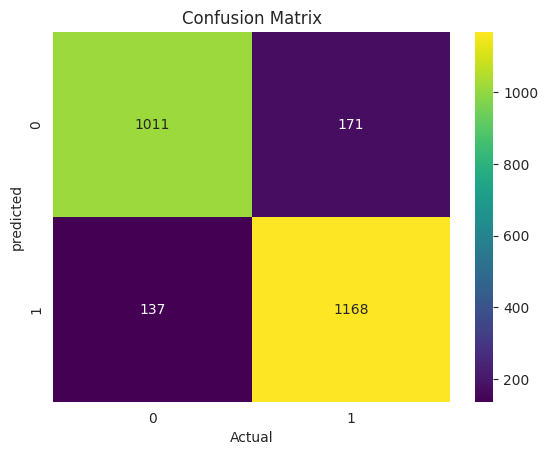

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_test)
print(classification_report(Y_test, RF_pred))
print(confusion_matrix(Y_test, RF_pred))
RF_acc = accuracy_score(Y_test, RF_pred)
print(f"Random Forest Accuracy: {RF_acc*100}%")
RF_prob = RF.predict_proba(X_test)
RF_loss = log_loss(Y_test, RF_prob)
print(f"Random Forest Log Loss: {RF_loss*100}%")
cm = confusion_matrix(Y_test, RF_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=RF.classes_,
            yticklabels=RF.classes_)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Confusion Matrix')
plt.show()

**Apply GRU**

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6497 - loss: 0.6454 - val_accuracy: 0.7838 - val_loss: 0.4839
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7866 - loss: 0.4715 - val_accuracy: 0.8269 - val_loss: 0.3981
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8319 - loss: 0.3928 - val_accuracy: 0.8648 - val_loss: 0.3410
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8549 - loss: 0.3548 - val_accuracy: 0.8579 - val_loss: 0.3394
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8484 - loss: 0.3483 - val_accuracy: 0.8760 - val_loss: 0.3131
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8584 - loss: 0.3319 - val_accuracy: 0.8682 - val_loss: 0.3111
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8623 - loss: 0.3208 - val_accuracy: 0.8742 - val_loss: 0.3020
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8697 - loss: 0.3133 - val_accuracy: 0.

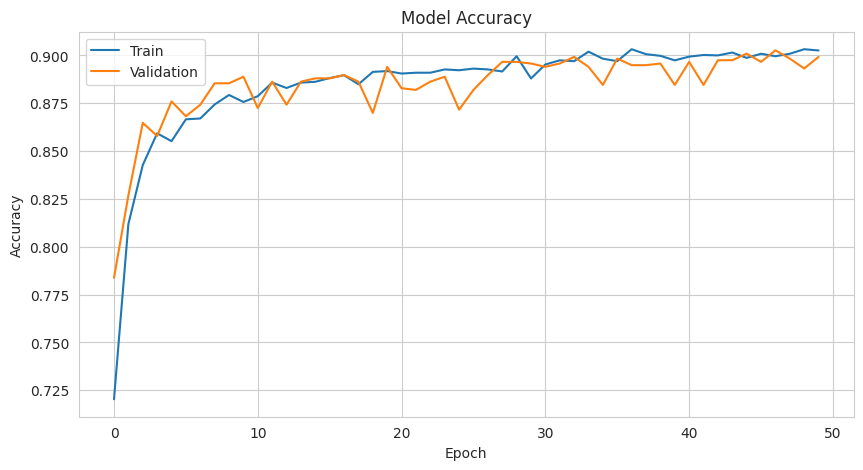

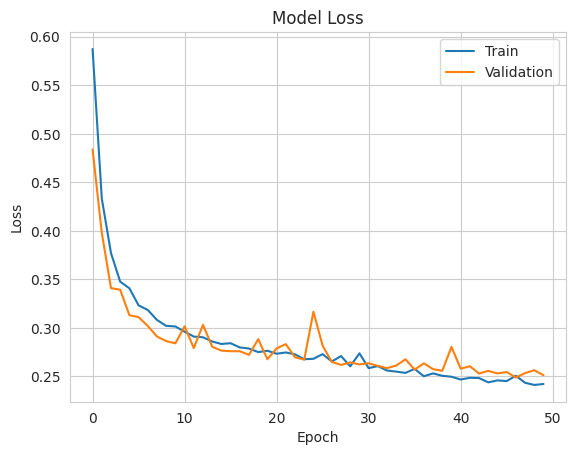

In [ ]:
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.models import Sequential
timesteps = 1
X_train_reshape = X_train.values.reshape((X_train.shape[0], timesteps, X_train.shape[1]))
X_test_reshape = X_test.values.reshape((X_test.shape[0], timesteps, X_test.shape[1]))
M = Sequential()
M.add(GRU(units=64, return_sequences=True, input_shape=(timesteps, X_train.shape[1])))
M.add(Dense(1, activation='sigmoid'))
M.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = M.fit(X_train_reshape, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
pred_loss, pred_accuracy = M.evaluate(X_test_reshape, Y_test, verbose=0)
print(f"GRU Test Loss: {pred_loss * 100:.4f}%")
print(f"GRU Test Accuracy: {pred_accuracy * 100:.4f}%")
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.show()

Epoch 1/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9024 - loss: 0.2449 - val_accuracy: 0.8932 - val_loss: 0.2555
Epoch 2/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9008 - loss: 0.2348 - val_accuracy: 0.8958 - val_loss: 0.2532
Epoch 3/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9016 - loss: 0.2510 - val_accuracy: 0.8898 - val_loss: 0.2578
Epoch 4/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9082 - loss: 0.2305 - val_accuracy: 0.8803 - val_loss: 0.2560
Epoch 5/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9060 - loss: 0.2322 - val_accuracy: 0.8863 - val_loss: 0.2623
Epoch 6/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8948 - loss: 0.2406 - val_accuracy: 0.8794 - val_loss: 0.2694
Epoch 7/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9000 - loss: 0.2403 - val_accuracy: 0.8958 - val_loss: 0.2514
Epoch 8/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8954 - loss: 0.2471 - val_accuracy: 0.

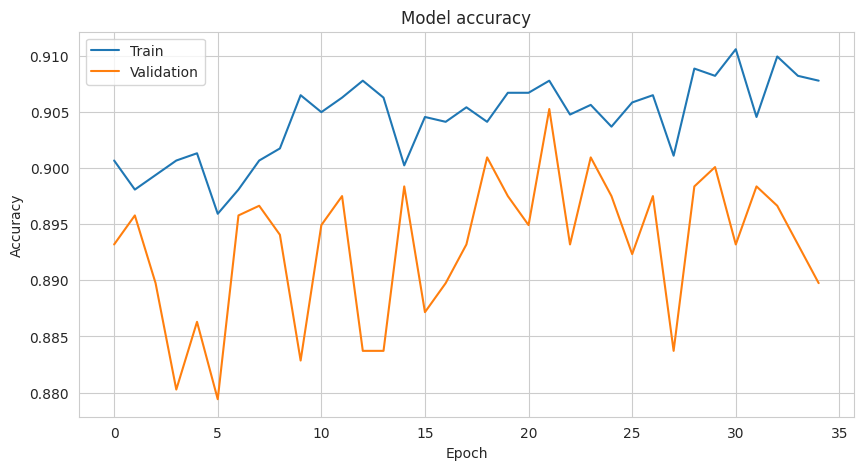

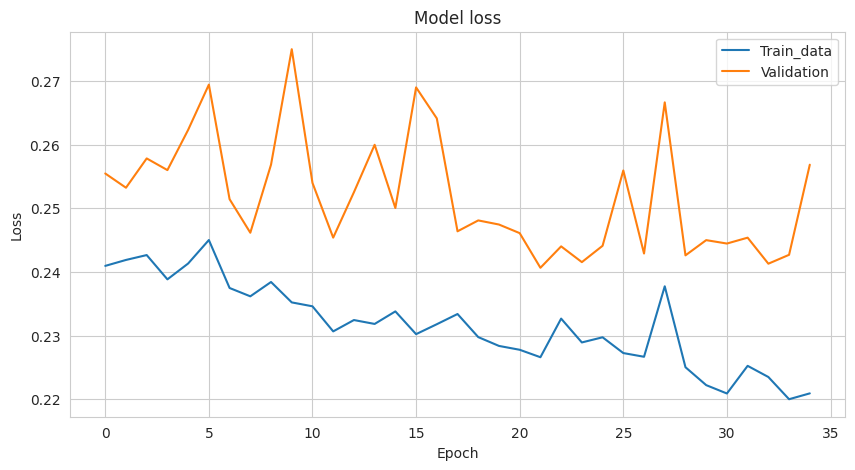

In [ ]:
history = M.fit(X_train_reshape, Y_train, epochs=35, batch_size=32, verbose=1, validation_split=0.2)
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_data', 'Validation'], loc='best')
plt.show()

In [ ]:
M.save('gru_model.keras')

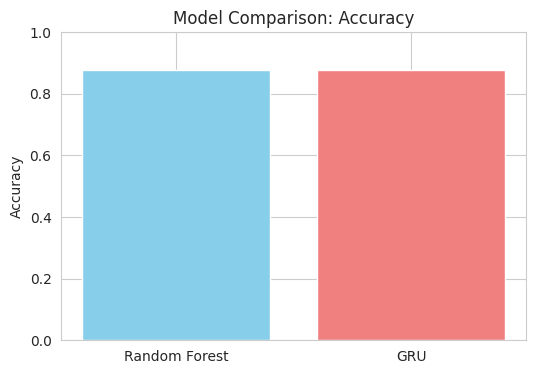

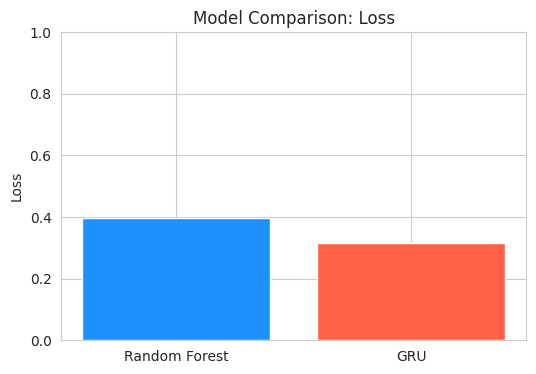

In [ ]:
results = {
    'Model': ['Random Forest', 'GRU'],
    'Accuracy': [RF_acc, RF_acc],
    'Loss': [RF_loss, pred_loss]
}
results_df = pd.DataFrame(results)
plt.figure(figsize=(6,4))
plt.bar(results_df['Model'], results_df['Accuracy'], color=['skyblue', 'lightcoral'])
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
results_df = pd.DataFrame(results)
plt.figure(figsize=(6,4))
plt.bar(results_df['Model'], results_df['Loss'], color=['dodgerblue', 'tomato'])
plt.title('Model Comparison: Loss')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.show()

In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
import joblib
import pandas as pd
import numpy as np
from urllib.parse import urlparse
import tensorflow as tf  # For loading GRU model

In [ ]:
def extract_features(url):
    """Extract features matching the exact training data columns."""
    try:
        parsed_url = urlparse(url)

        features = {
            'Dots_num': url.count('.'),
            'Level_subD': len(parsed_url.netloc.split('.')) - 1 if parsed_url.netloc else 0,
            'Path_level': len([x for x in parsed_url.path.split('/') if x]),
            'UrlLength': len(url),
            'Dash_num': url.count('-'),
            'Dash_in_Host': parsed_url.netloc.count('-'),
            'At_symbol': url.count('@'),
            'tilde': url.count('~'),
            'Underscore_num': url.count('_'),
            'percent': url.count('%'),
            'Query_comp': 1 if parsed_url.query else 0,
            'Ampersand': url.count('&'),
            'Hash': url.count('#'),
            'NoHttps': 0 if url.startswith('https://') else 1,
            'random_str': 1 if any(c.isdigit() and c.isalpha() for c in url) else 0,
            'IP': 1 if any(x.isdigit() for x in parsed_url.netloc.split('.')) else 0,
            'domain_in_subd': 1 if len(parsed_url.netloc.split('.')) > 2 else 0,
            'domain_in_paths': 1 if parsed_url.netloc in parsed_url.path else 0,
            'https_in_host': 1 if 'https' in parsed_url.netloc else 0,
            'double_slash': 1 if '//' in url[8:] else 0,
            'sensitive_words': 1 if any(word in url.lower() for word in ['login', 'signin', 'account', 'password', 'secure']) else 0,
            'Emb_brand': 1 if any(brand in url.lower() for brand in ['paypal', 'linkedin', 'facebook', 'microsoft', 'apple']) else 0,
            'favicon_ext': 1 if any(ext in url for ext in ['.ico', '.icon']) else 0,
            'insecure_forms': 1 if 'http://' in url and 'form' in url else 0
        }

        return pd.DataFrame([features])

    except Exception as e:
        print(f"Feature extraction error: {str(e)}")
        return None

In [ ]:
def predict_url(url):
    try:
        # Load both models
        rf_model = joblib.load('phishing_detector_model.joblib')
        gru_model = tf.keras.models.load_model('gru_model.keras')

        # Extract features
        features = extract_features(url)
        if features is None:
            return "Error processing URL", "", ""

        # Get Random Forest prediction
        rf_pred = rf_model.predict(features)[0]
        rf_prob = rf_model.predict_proba(features)[0]
        rf_confidence = rf_prob[1] if rf_pred == 1 else rf_prob[0]

        # Prepare features for GRU and get prediction
        gru_features = features.values.reshape(1, 1, -1)
        gru_pred = gru_model.predict(gru_features, verbose=0)  # Add verbose=0 to suppress progress bar
        gru_pred = float(gru_pred[0][0])  # Convert to float
        gru_pred_class = 1 if gru_pred > 0.5 else 0
        gru_confidence = gru_pred if gru_pred_class == 1 else 1 - gru_pred

        # Prepare detailed result
        result = f"""
🔍 Analysis Results:

Random Forest Model:
{'⚠️ Potential Phishing' if rf_pred == 1 else '✅ Legitimate'} (Confidence: {rf_confidence:.2%})

GRU Model:
{'⚠️ Potential Phishing' if gru_pred_class == 1 else '✅ Legitimate'} (Confidence: {gru_confidence:.2%})

Final Verdict:
{'⚠️ Potential Phishing - Exercise Caution!' if (rf_pred + gru_pred_class) >= 1 else '✅ Legitimate URL - Appears Safe'}
{'🤝 Both Models Agree' if rf_pred == gru_pred_class else '⚠️ Models Disagree - Additional Caution Advised'}
"""

        # Prepare feature analysis
        analysis = "🔍 URL Analysis Details:\n" + "\n".join(f"• {k}: {v}" for k, v in features.iloc[0].items())

        # Prepare importance scores
        importance = pd.DataFrame({
            'Feature': features.columns,
            'Importance': rf_model.feature_importances_
        })
        importance = importance.sort_values('Importance', ascending=False)

        # Build comprehensive analysis
        importance_text = "🎯 Key Risk Indicators (Top 5):\n" + \
                         "\n".join(f"• {row['Feature']}: {row['Importance']:.4f}"
                                 for _, row in importance.head().iterrows())

        importance_text += "\n\n📊 Model Confidence Summary:\n"
        importance_text += f"• Random Forest: {rf_confidence:.2%}\n"
        importance_text += f"• GRU Model: {gru_confidence:.2%}\n"
        importance_text += f"• Model Agreement: {'✅ Yes' if rf_pred == gru_pred_class else '⚠️ No'}"

        if rf_pred != gru_pred_class:
            importance_text += "\n\n⚠️ Note: Models disagree on this URL. Consider additional verification steps."

        return result, analysis, importance_text

    except Exception as e:
        error_msg = str(e)
        print(f"Debug - Full error: {error_msg}")  # Add debug print
        return f"⚠️ Error: {error_msg}", "", ""

In [ ]:
# Create custom CSS for better styling
custom_css = """
.gradio-container {
    font-family: 'Arial', sans-serif;
}
.gr-button {
    background-color: #2196F3;
    border: none;
}
.gr-button:hover {
    background-color: #1976D2;
}
"""

# Create the interface with custom theme
demo = gr.Interface(
    fn=predict_url,
    inputs=[
        gr.Textbox(
            label="Enter URL to Check",
            placeholder="https://example.com",
            lines=1
        )
    ],
    outputs=[
        gr.Textbox(label="Prediction Results", lines=8),
        gr.Textbox(label="Detailed Analysis", lines=10),
        gr.Textbox(label="Risk Assessment", lines=10)
    ],
    title="🛡️ Phish Defender: Your Online Safety Buddy",
    description="Developed by Zaiba Saeed | Enter a URL to check if it might be a phishing attempt",
    article="""
    ### How to Use:
    1. Enter any URL you want to check
    2. Click 'Submit' to analyze
    3. Review the detailed analysis and risk assessment

    ### Stay Safe Online:
    - Always verify URLs before entering sensitive information
    - Look for secure connections (https://)
    - Be cautious of unexpected requests

    ### About:
    This tool uses advanced machine learning (Random Forest and GRU) to detect potential phishing websites.
    """,
    examples=[
        ["https://www.google.com"],
        ["https://www.linkedin.com/feed"],
        ["https://www.paypal.com/signin"],
    ],
    css=custom_css,
    theme=gr.themes.Soft(
        primary_hue="blue",
        secondary_hue="purple",
    )
)

# Launch the interface
if __name__ == "__main__":
    demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://210b8ba0b60ace11f5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
